# Skimlit

https://www.aclweb.org/anthology/I17-2052.pdf

https://github.com/Franck-Dernoncourt/pubmed-rct


In [ ]:
!git clone "https://github.com/Franck-Dernoncourt/pubmed-rct"

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 0), reused 0 (delta 0), pack-reused 30
Unpacking objects: 100% (33/33), done.


In [ ]:
import os

os.listdir("/content/pubmed-rct")

['.git',
 'PubMed_20k_RCT',
 'PubMed_200k_RCT',
 'PubMed_20k_RCT_numbers_replaced_with_at_sign',
 'README.md',
 'PubMed_200k_RCT_numbers_replaced_with_at_sign']

In [ ]:
# PubMed_200k_RCT_numbers_replaced_with_at_sign - at sign (@) replaces all numbers in the text.

##### Using 10% data i.e. 20k dataset

In [ ]:
os.listdir("/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign")

['train.txt', 'dev.txt', 'test.txt']

In [ ]:
# The dev.txt file is the validation_data.(commonly used term for validation_data)

In [ ]:
def getlines(filename):

  with open(filename,"r") as f:
    return f.readlines()

In [ ]:
file_name = "/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt"

train_lines = getlines(file_name)

train_lines

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [ ]:
len(train_lines)

210040

In [ ]:
train_lines[0],train_lines[2]

('###24293578\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n')

####################################################################

Exploring train_lines

In [ ]:
train_lines[:100]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

####################################################################

In [ ]:
# Making a list of dictionaries.
# Each dictionary will be a sentence of an abstract with line number,target,text and total lines as keys

def preprocess_text_with_line_numbers(filename):
  
  input_lines = getlines(filename)

  abstracts = []
  abstract = []
  for line in input_lines:

    if line.startswith("###"):
      abstracts.append(abstract)
      abstract = []
    else:
      abstract.append(line)

  abstracts.remove([])

  for abstract in  abstracts:
    abstract.remove('\n')

  final_list = []
  for abstract in abstracts:

    total_lines_in_abstract = len(abstract)

    for line in enumerate(abstract):

      d = {}

      line_number = line[0]

      line_text = line[1]

      parts = line_text.split("\t")

      target = parts[0]

      text = parts[1].split("\n")[0].lower()
      d["line_number"] = line_number
      d["target"] = target
      d["text"] = text
      d["total_lines"] = total_lines_in_abstract
      final_list.append(d)

  return final_list

In [ ]:
# File paths

file_path = "/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

# Preprocessing train,test and validation data.

train_samples = preprocess_text_with_line_numbers(file_path+"train.txt")
test_samples = preprocess_text_with_line_numbers(file_path+"test.txt")
val_samples = preprocess_text_with_line_numbers(file_path+"dev.txt")

In [ ]:
# Seeing our samples

train_samples[:15]

[{'line_number': 0,
  'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'total_lines': 12},
 {'line_number': 1,
  'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'total_lines': 12},
 {'line_number': 2,
  'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'total_lines': 12},
 {'line_number': 3,
  'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'total_lines': 12},
 {'line_number': 4,
  'target': 'METHODS',
  'text': 'secondary outcome measures include

In [ ]:
test_samples[:5]

[{'line_number': 0,
  'target': 'BACKGROUND',
  'text': 'this study analyzed liver function abnormalities in heart failure patients admitted with severe acute decompensated heart failure ( adhf ) .',
  'total_lines': 9},
 {'line_number': 1,
  'target': 'RESULTS',
  'text': 'a post hoc analysis was conducted with the use of data from the evaluation study of congestive heart failure and pulmonary artery catheterization effectiveness ( escape ) .',
  'total_lines': 9},
 {'line_number': 2,
  'target': 'RESULTS',
  'text': 'liver function tests ( lfts ) were measured at @ time points from baseline , at discharge , and up to @ months follow-up .',
  'total_lines': 9},
 {'line_number': 3,
  'target': 'RESULTS',
  'text': 'survival analyses were used to assess the association between admission model of end-stage liver disease excluding international normalized ratio ( meld-xi ) scores and patient outcome.there was a high prevalence of abnormal baseline ( admission ) lfts ( albumin @ % , aspart

In [ ]:
val_samples[:5]

[{'line_number': 0,
  'target': 'BACKGROUND',
  'text': 'ige sensitization to aspergillus fumigatus and a positive sputum fungal culture result are common in patients with refractory asthma .',
  'total_lines': 10},
 {'line_number': 1,
  'target': 'BACKGROUND',
  'text': 'it is not clear whether these patients would benefit from antifungal treatment .',
  'total_lines': 10},
 {'line_number': 2,
  'target': 'OBJECTIVE',
  'text': 'we sought to determine whether a @-month course of voriconazole improved asthma-related outcomes in patients with asthma who are ige sensitized to a fumigatus .',
  'total_lines': 10},
 {'line_number': 3,
  'target': 'METHODS',
  'text': 'asthmatic patients who were ige sensitized to a fumigatus with a history of at least @ severe exacerbations in the previous @ months were treated for @ months with @ mg of voriconazole twice daily , followed by observation for @ months , in a double-blind , placebo-controlled , randomized design .',
  'total_lines': 10},
 {'l

In [ ]:
# Using Pandas for better visualization of our samples

In [ ]:
import pandas as pd

In [ ]:
train_df = pd.DataFrame(train_samples)

test_df = pd.DataFrame(test_samples)

val_df = pd.DataFrame(val_samples)

In [ ]:
train_df.head(14)

,line_number,target,text,total_lines
0,0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,12
1,1,METHODS,a total of @ patients with primary knee oa wer...,12
2,2,METHODS,outcome measures included pain reduction and i...,12
3,3,METHODS,pain was assessed using the visual analog pain...,12
4,4,METHODS,secondary outcome measures included the wester...,12
5,5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",12
6,6,RESULTS,there was a clinically relevant reduction in t...,12
7,7,RESULTS,the mean difference between treatment arms ( @...,12
8,8,RESULTS,"further , there was a clinically relevant redu...",12
9,9,RESULTS,these differences remained significant at @ we...,12


##### Analysing the df

In [ ]:
train_df.target.value_counts()

METHODS        59349
RESULTS        57949
CONCLUSIONS    27166
BACKGROUND     21726
OBJECTIVE      13838
Name: target, dtype: int64

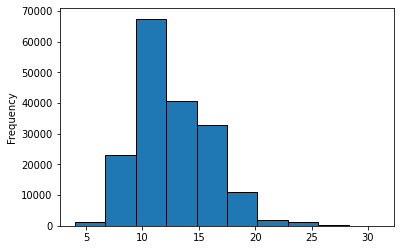

In [ ]:
# Making a histogram of number of lines vs total_lines

# This will tell us the number of lines in various abstracts.

train_df.total_lines.plot.hist(edgecolor='k',bins = 10)

We see that most of the abstracts had around 8-15 sentences.

In [ ]:
# List of sentences

train_sentences = train_df["text"].tolist()

test_sentences = test_df["text"].tolist()

val_sentences = val_df["text"].tolist()

len(train_sentences)

180028

### Encoding the labels 

##### We're going to create one hot and label encoded labels.

We could get away with just making label encoded labels, however, TensorFlow's CategoricalCrossentropy loss function likes to have one hot encoded labels (this will enable us to use label smoothing later on).

To numerically encode labels we'll use Scikit-Learn's OneHotEncoder and LabelEncoder classes.

##### OneHotEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse = False)

train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1,1))

test_labels_one_hot = one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1,1))

val_labels_one_hot = one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1,1))

In [ ]:
train_labels_one_hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

##### LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())

test_labels_encoded  = label_encoder.transform(test_df["target"].to_numpy())

val_labels_encoded  = label_encoder.transform(val_df["target"].to_numpy()) 

In [ ]:
train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

##### Getting class names

In [ ]:
num_classes = len(label_encoder.classes_)

class_names = label_encoder.classes_

num_classes,class_names

(5, array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

### Modelling Experiments

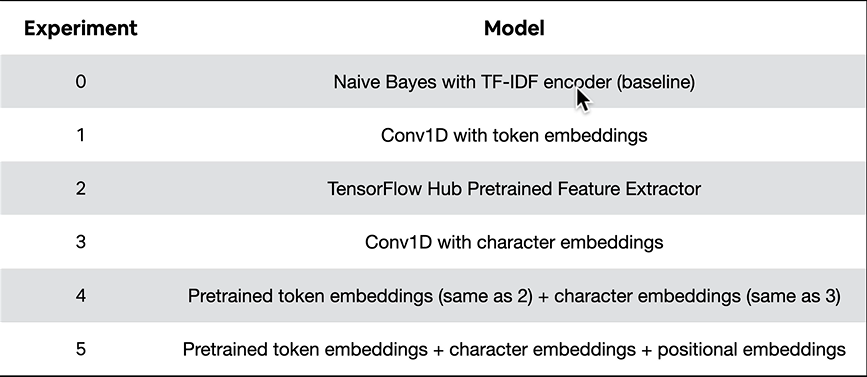

# Model-0 Basline Model

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB

from sklearn.pipeline import Pipeline

In [ ]:
model0 = Pipeline([
    ("tf-idf",TfidfVectorizer()),
    ("clf",MultinomialNB())
])

model0.fit(X = train_sentences,y = train_labels_encoded);



In [ ]:
# evaluating

model0.score(X = val_sentences,y = val_labels_encoded)

0.7220014570501357

In [ ]:
# Making predicitons

baseline_preds = model0.predict(val_sentences)
baseline_preds


array([4, 1, 3, ..., 4, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
      y_true: true labels in the form of a 1D array
      y_pred: predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [ ]:
baseline_results = calculate_results(val_labels_encoded, baseline_preds)                           
baseline_results

{'accuracy': 72.20014570501357,
 'f1': 0.6990829939657178,
 'precision': 0.7189252355241629,
 'recall': 0.7220014570501357}

### Model1 Conv1D

Preparing our data for deep sequence model

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
# Finding average length of a sentence.

total = 0 
count = 0

sentence_lengths = []

for sentence in train_sentences:
  length = len(sentence.split())
  sentence_lengths.append(length)
  total += length
  count+=1

avg_sen_len = total/count
print(avg_sen_len)

26.338069633612548


(array([1.59979e+05, 1.87600e+04, 1.15000e+03, 9.90000e+01, 2.80000e+01,
        1.00000e+01, 2.00000e+00]),
 array([  1.        ,  43.14285714,  85.28571429, 127.42857143,
        169.57142857, 211.71428571, 253.85714286, 296.        ]),
 <a list of 7 Patch objects>)

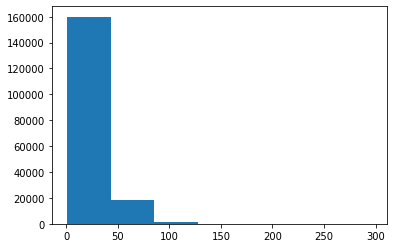

In [ ]:
import matplotlib.pyplot as plt

plt.hist(sentence_lengths,bins = 7)

In [ ]:
# Finding out the length of 95% of the sentences

output_sen_length =  int(np.percentile (sentence_lengths,95))

output_sen_length

55

When we create our tokenization layer, we'll use this value to turn all of our sentences into the same length.

Sentences with a length below 55 get padded with zeros and sentences with a length above 55 get truncated (words after 55 get cut off).

### Creating a text vectorizer

In [ ]:
# How many words are in our vocabulary? (taken from 3.2 in https://arxiv.org/pdf/1710.06071.pdf)
max_tokens = 68000

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [ ]:
# Creating the text vectorizer

text_vectorizer = TextVectorization(max_tokens = max_tokens,
                                    output_sequence_length = output_sen_length)

In [ ]:
# Fitting/Adapting to our training data. 

# Text Vectorizer (tokenizer) figures out the number that will be given to a word.

text_vectorizer.adapt(train_sentences)

In [ ]:
# Trying to see how the text vectorizer tokenizes the words.

import random

target_sentence = random.choice(train_sentences)

print(f"Text = {target_sentence}")

print()

print(f"Vectorized Text = {text_vectorizer([target_sentence])}")

Text = repeated @-week courses of daily oral ulipristal acetate ( @ and @ mg ) effectively control bleeding and pain , reduce fibroid volume , and restore qol in patients with symptomatic fibroids .

Vectorized Text = [[  818    89  2539     4   161   217 16397  2480     3    68  1294    35
    506     3    65   270 12662   326     3  6602   609     5    12     7
    884  8081     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]


In [ ]:
text_vectorizer.get_config()

{'dtype': 'string',
 'max_tokens': 68000,
 'name': 'text_vectorization',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'split': 'whitespace',
 'standardize': 'lower_and_strip_punctuation',
 'trainable': True,
 'vocabulary_size': 64836}

In [ ]:
vocab = text_vectorizer.get_vocabulary()

print(f"Length of vocab = {len(vocab)}")

print(f"Most common words = {vocab[:5]}")

print()

print(f"Least common words = {vocab[-5:]}")


Length of vocab = 64836
Most common words = ['', '[UNK]', 'the', 'and', 'of']

Least common words = ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [ ]:
vocab

['',
 '[UNK]',
 'the',
 'and',
 'of',
 'in',
 'to',
 'with',
 'a',
 'were',
 'was',
 'for',
 'patients',
 'group',
 'p',
 'at',
 'or',
 'study',
 'on',
 'treatment',
 'is',
 'after',
 'by',
 'this',
 'groups',
 'as',
 'an',
 'from',
 'that',
 'randomized',
 'between',
 'not',
 'trial',
 'no',
 'compared',
 'control',
 'be',
 'significant',
 'intervention',
 'significantly',
 'n',
 'months',
 'than',
 'we',
 'vs',
 'rsb',
 'lsb',
 'clinical',
 'placebo',
 'baseline',
 'ci',
 'two',
 'during',
 'weeks',
 'both',
 'had',
 'primary',
 'mean',
 'are',
 'using',
 'participants',
 'there',
 'all',
 'time',
 'years',
 'pain',
 'therapy',
 'who',
 'mg',
 'more',
 'effect',
 'effects',
 'but',
 'risk',
 'difference',
 'outcomes',
 'total',
 'care',
 'rate',
 'efficacy',
 'received',
 'associated',
 'higher',
 'respectively',
 'days',
 'analysis',
 'outcome',
 'use',
 'one',
 'week',
 'women',
 'may',
 'randomly',
 'levels',
 'followup',
 'will',
 'increased',
 'health',
 'used',
 'have',
 'data'

### Embedding

In [ ]:
# Creating the embedding layer

token_embed = layers.Embedding(input_dim = len(vocab),
                               output_dim = 128,
                               mask_zero = True,
                               name = "embedding_layer")

In [ ]:
# Seeing how the embedding layer embeds a sentence

print(f"Sample sentence = {target_sentence} \n")

vectorized_sentence = text_vectorizer([target_sentence])

print(f"Vectorized Sentence = {vectorized_sentence} \n")

embedded_sentence = token_embed(vectorized_sentence)

print(f"Embedded Sentence = {embedded_sentence} \n")

print(f"Shape of embedded sentence = {embedded_sentence.shape}")

Sample sentence = repeated @-week courses of daily oral ulipristal acetate ( @ and @ mg ) effectively control bleeding and pain , reduce fibroid volume , and restore qol in patients with symptomatic fibroids . 

Vectorized Sentence = [[  818    89  2539     4   161   217 16397  2480     3    68  1294    35
    506     3    65   270 12662   326     3  6602   609     5    12     7
    884  8081     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]] 

Embedded Sentence = [[[ 0.03989735  0.00196107  0.0013181  ...  0.03556288 -0.03439657
   -0.00105221]
  [-0.03084958  0.02729361 -0.04164724 ... -0.04315626 -0.02222861
    0.00672996]
  [ 0.02347059 -0.01567934 -0.0264558  ...  0.03321215  0.04303375
    0.00344799]
  ...
  [ 0.0379541   0.04671745 -0.03566181 ...  0.0126198   0.02556261
   -0.02480592]
  [ 0.0379541   0.04671745 -0.03566181 ...  0.0126198   0.025562

We have the data now, text vectorizer has been made and the embedding layer has also been made.

Another thing that can be done is to use the tf.data API for faster data loading

### tf.data API for faster data loading

##### Turning data into PrefetchDataset of batches.

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences,
                                                    train_labels_one_hot))

valid_dataset = tf.data.Dataset.from_tensor_slices((val_sentences,
                                                    val_labels_one_hot))

test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences,test_labels_encoded))

train_dataset

<TensorSliceDataset shapes: ((), (5,)), types: (tf.string, tf.float64)>

In [ ]:
# Turning the TensorSliceDatasets into prefetched batches

train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<PrefetchDataset shapes: ((None,), (None, 5)), types: (tf.string, tf.float64)>

# Model-1 Conv1D with token embeddings

Input (text) -> Tokenize -> Embedding -> Layers -> Output (label probability)

In [ ]:
inputs = layers.Input(shape = (1,),dtype = tf.string) # (1,) is the shape that means a 1d list

text_vectors = text_vectorizer(inputs)

token_embeddings = token_embed(text_vectors)

x = layers.Conv1D(64,kernel_size=5,padding = "same",activation = "relu")(token_embeddings)

x = layers.GlobalAveragePooling1D()(x)

outputs = layers.Dense(num_classes,
                       activation = "softmax")(x)

model1 = tf.keras.Model(inputs,outputs)

In [ ]:
# Compiling

model1.compile(loss = "categorical_crossentropy",
              optimizer = "Adam",
              metrics = ["accuracy"])

In [ ]:
model1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 55)                0         
_________________________________________________________________
embedding_layer (Embedding)  (None, 55, 128)           8299008   
_________________________________________________________________
conv1d (Conv1D)              (None, 55, 64)            41024     
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 5)                 325       
Total params: 8,340,357
Trainable params: 8,340,357
Non-trainable params: 0
___________________________________________________

In [ ]:
# Fitting

model1_history = model1.fit(train_dataset,
                            steps_per_epoch = 0.1*len(train_dataset),# Train on 10% of batches for faster training time 
                            epochs = 3,
                            validation_data = valid_dataset,
                            validation_steps = 0.1*len(valid_dataset))

Epoch 1/3
562/562 [==============================] - 77s 81ms/step - loss: 0.9206 - accuracy: 0.6360 - val_loss: 0.6944 - val_accuracy: 0.7329
Epoch 2/3
562/562 [==============================] - 45s 79ms/step - loss: 0.6651 - accuracy: 0.7539 - val_loss: 0.6438 - val_accuracy: 0.7638
Epoch 3/3
562/562 [==============================] - 45s 80ms/step - loss: 0.6222 - accuracy: 0.7722 - val_loss: 0.6002 - val_accuracy: 0.7849


In [ ]:
model1.evaluate(valid_dataset)

944/944 [==============================] - 3s 3ms/step - loss: 0.6001 - accuracy: 0.7859


[0.6000813841819763, 0.7858798503875732]

In [ ]:
# Making predictions

model1_pred_probs = model1.predict(valid_dataset)
model1_pred_probs

array([[4.1532993e-01, 2.0512530e-01, 6.8677694e-02, 2.8785381e-01,
        2.3013329e-02],
       [4.4608286e-01, 2.9111043e-01, 1.0534501e-02, 2.4579650e-01,
        6.4756935e-03],
       [1.4832135e-01, 8.8154851e-03, 1.9120667e-03, 8.4093565e-01,
        1.5579588e-05],
       ...,
       [2.3281068e-06, 1.4651777e-03, 5.4005586e-04, 7.8576335e-07,
        9.9799168e-01],
       [1.8163664e-02, 9.7007883e-01, 2.0641419e-04, 7.1254973e-03,
        4.4254847e-03],
       [4.9679819e-03, 9.8609877e-01, 4.3454285e-05, 5.7666977e-03,
        3.1231414e-03]], dtype=float32)

In [ ]:
# Probs to classes

model1_preds = tf.argmax(model1_pred_probs,axis = 1)
model1_preds

<tf.Tensor: shape=(30198,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 1, 1])>

In [ ]:
# Calculating results

model1_results = calculate_results(y_true = val_labels_encoded,
                                   y_pred = model1_preds)

model1_results

{'accuracy': 78.58798595933506,
 'f1': 0.7836125079431205,
 'precision': 0.7831014050335909,
 'recall': 0.7858798595933506}

Custom embeddings take time to train, we can use some pretrained embeddings to initialize token embeddings.
The research paper mentions use of GloVe embeddings but they are not available in Tensorflow Hub, so we will use USE embeddings.

Inputs (string) -> Pretrained embeddings from TensorFlow Hub (Universal Sentence Encoder) -> Layers -> Output (prediction probabilities)

USE does not need a tokenizer as it does it for us.

In [ ]:
import tensorflow_hub as hub

use_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                      trainable = False,
                                      name = "USE_Embedding")

In [ ]:
# Trying embedding on a random sentence

print(use_embedding_layer([target_sentence]))

print(use_embedding_layer([target_sentence]).shape)

tf.Tensor(
[[-0.01903995 -0.05019327  0.05779617  0.00212386  0.00830793 -0.06367804
   0.0372435  -0.04161945 -0.02012966  0.04360422  0.07690331 -0.03864927
   0.01984312 -0.02288325  0.00960878  0.05177078 -0.07754865  0.00475859
  -0.06180018  0.04538622  0.01565372  0.07204697  0.05354968 -0.04741318
  -0.01118093 -0.03483024  0.05538421 -0.01419099 -0.05456856 -0.01037143
   0.06558067  0.07758552  0.05999693 -0.06820245 -0.07049215 -0.05315603
  -0.02358603  0.06133512 -0.0208241  -0.05808974 -0.03514877  0.01770834
   0.03023736 -0.05657919  0.06282799  0.06828165 -0.03364258  0.05519611
  -0.04958772  0.02061746 -0.04915438  0.01019303 -0.05572622  0.05717393
   0.06694321  0.02617928  0.04303752  0.04204193 -0.04712696 -0.04582395
  -0.03028075 -0.05945832  0.0506734  -0.02760002  0.03321737 -0.00627236
   0.0594153   0.02422055 -0.02561698 -0.07634703 -0.01411671  0.00572245
   0.01571702  0.02285475  0.02944653  0.05390812  0.01060533  0.03498385
   0.05749331 -0.01935819 -

# Model-2 Feature Extraction Model

In [ ]:
inputs = layers.Input(shape = [],dtype = tf.string)

pretrained_embedding = use_embedding_layer(inputs)

x = layers.Dense(128,activation="relu")(pretrained_embedding)

outputs = layers.Dense(len(class_names),activation = "softmax")(x)

model2 = tf.keras.Model(inputs,outputs)

In [ ]:
# Compiling

model2.compile(loss = "categorical_crossentropy",
               optimizer = "Adam",
               metrics = ["accuracy"])

In [ ]:
model2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None,)]                 0         
_________________________________________________________________
USE_Embedding (KerasLayer)   (None, 512)               256797824 
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 645       
Total params: 256,864,133
Trainable params: 66,309
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# Fitting

model2.fit(train_dataset,
           epochs = 3,
           steps_per_epoch = 0.1*len(train_dataset),
           validation_data = valid_dataset,
           validation_steps = 0.1*len(valid_dataset))

Epoch 1/3
562/562 [==============================] - 9s 12ms/step - loss: 0.9146 - accuracy: 0.6484 - val_loss: 0.8059 - val_accuracy: 0.6852
Epoch 2/3
562/562 [==============================] - 6s 11ms/step - loss: 0.7711 - accuracy: 0.7008 - val_loss: 0.7618 - val_accuracy: 0.6974
Epoch 3/3
562/562 [==============================] - 6s 11ms/step - loss: 0.7537 - accuracy: 0.7115 - val_loss: 0.7437 - val_accuracy: 0.7138


In [ ]:
model2.evaluate(valid_dataset)

944/944 [==============================] - 9s 9ms/step - loss: 0.7423 - accuracy: 0.7135


[0.7423271536827087, 0.7135241031646729]

In [ ]:
# Making predictions

model2_pred_probs = model2.predict(valid_dataset)

model2_preds = tf.argmax(model2_pred_probs,axis = 1)

model2_preds

<tf.Tensor: shape=(30198,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 1, 1])>

In [ ]:
# Getting the results

model2_results = calculate_results(val_labels_encoded,model2_preds)

model2_results

{'accuracy': 71.3524074442016,
 'f1': 0.7106869396081449,
 'precision': 0.714283931317147,
 'recall': 0.713524074442016}

# Model3 Conv1D with character embeddings

In [ ]:
# Making a function to split sentences into characters

def split_chars(text):
  return " ".join(list(text))

# Test splitting non-character-level sequence into characters
type(split_chars(target_sentence))

str

In [ ]:
train_chars = [split_chars(sentence) for sentence in train_sentences]

val_chars = [split_chars(sentence) for sentence in val_sentences]

test_chars = [split_chars(sentence) for sentence in test_sentences]

In [ ]:
# Finding average character length 

char_lens = [len(sentence) for sentence in train_sentences]

mean_char_len = np.mean(char_lens)

mean_char_len

149.36486546537205

(array([9.2686e+04, 7.6337e+04, 9.6880e+03, 1.0890e+03, 1.6700e+02,
        4.2000e+01, 1.3000e+01, 3.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([1.0000e+00, 1.3950e+02, 2.7800e+02, 4.1650e+02, 5.5500e+02,
        6.9350e+02, 8.3200e+02, 9.7050e+02, 1.1090e+03, 1.2475e+03,
        1.3860e+03]),
 <a list of 10 Patch objects>)

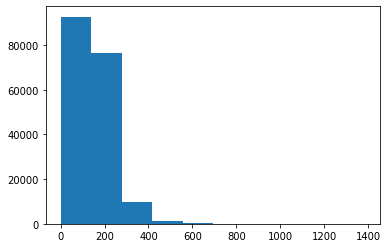

In [ ]:
plt.hist(char_lens)

In [ ]:
# Top 95% lengths

output_sen_length = int(np.percentile(char_lens,95))

output_sen_length

290

In [ ]:
# Getting all letters,digits and punctuations + space + OOV(out of vocabulary)

import string

alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# Creating a char-level vectorizer instance

num_char_tokens = len(alphabet)+2

char_vectorizer = TextVectorization(max_tokens = num_char_tokens,
                                    output_sequence_length = output_sen_length,
                                    standardize = "lower_and_strip_punctuation",
                                    name = "char_vectorizer")

# Adapt
char_vectorizer.adapt(train_chars)

In [ ]:
# Test out character vectorizer
random_train_chars = random.choice(train_chars)

print(f"Charified text:\n{random_train_chars}")

print(f"\nLength of chars: {len(random_train_chars.split())}")

vectorized_chars = char_vectorizer([random_train_chars])

print(f"\nVectorized chars:\n{vectorized_chars}")

print(f"\nLength of vectorized chars: {len(vectorized_chars[0])}")

Charified text:
t h e   n u m b e r   o f   p o r t   i m p l a n t a t i o n s   i s   i n c r e a s i n g   d u e   t o   t h e   d e v e l o p m e n t   o f   i n n o v a t i v e   a d j u v a n t   a n d   n e o - a d j u v a n t   t h e r a p i e s   .

Length of chars: 104

Vectorized chars:
[[ 3 13  2  6 16 15 22  2  8  7 17 14  7  8  3  4 15 14 12  5  6  3  5  3
   4  7  6  9  4  9  4  6 11  8  2  5  9  4  6 18 10 16  2  3  7  3 13  2
  10  2 21  2 12  7 14 15  2  6  3  7 17  4  6  6  7 21  5  3  4 21  2  5
  10 27 16 21  5  6  3  5  6 10  6  2  7  5 10 27 16 21  5  6  3  3 13  2
   8  5 14  4  2  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0 

In [ ]:
# Creating a character-level embedding

char_embed = layers.Embedding(input_dim = num_char_tokens,
                              output_dim = 25,   # used in the paper
                              mask_zero = True,
                              name = "char_embed")

In [ ]:
# Test out character embedding layer

print(f"Charified text (before vectorization and embedding):\n{random_train_chars}\n")

char_embed_example = char_embed(char_vectorizer([random_train_chars]))

print(f"Embedded chars (after vectorization and embedding):\n{char_embed_example}\n")

print(f"Character embedding shape: {char_embed_example.shape}")

Charified text (before vectorization and embedding):
t h e   n u m b e r   o f   p o r t   i m p l a n t a t i o n s   i s   i n c r e a s i n g   d u e   t o   t h e   d e v e l o p m e n t   o f   i n n o v a t i v e   a d j u v a n t   a n d   n e o - a d j u v a n t   t h e r a p i e s   .

Embedded chars (after vectorization and embedding):
[[[-0.03842164  0.01171558  0.02345083 ... -0.04820338 -0.0368772
    0.03091769]
  [ 0.02539457 -0.03274246 -0.01379978 ... -0.00984856  0.0252265
    0.01720891]
  [ 0.01283957  0.00267323 -0.02788013 ... -0.04699299 -0.01321969
   -0.0025171 ]
  ...
  [ 0.01808491 -0.00819633 -0.04281202 ...  0.04217182 -0.01075797
   -0.04337442]
  [ 0.01808491 -0.00819633 -0.04281202 ...  0.04217182 -0.01075797
   -0.04337442]
  [ 0.01808491 -0.00819633 -0.04281202 ...  0.04217182 -0.01075797
   -0.04337442]]]

Character embedding shape: (1, 290, 25)


In [ ]:
# Building the model

inputs = layers.Input(shape = (1,),dtype = "string")

char_vectors = char_vectorizer(inputs)

char_embeddings = char_embed(char_vectors)

x = layers.Conv1D(64,
                  kernel_size = 5,
                  padding = "same",
                  activation = "relu")(char_embeddings)

x = layers.GlobalMaxPooling1D()(x) 

outputs = layers.Dense(num_classes,activation="softmax")(x)

model3 = tf.keras.Model(inputs,outputs,name = "model3_char_embedding_Conv1D")

In [ ]:
# Compile

model3.compile(loss = "categorical_crossentropy",
               optimizer = "Adam",
               metrics = ["accuracy"])

In [ ]:
model3.summary()

Model: "model3_char_embedding_Conv1D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
char_vectorizer (TextVectori (None, 290)               0         
_________________________________________________________________
char_embed (Embedding)       (None, 290, 25)           1750      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 290, 64)           8064      
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 325       
Total params: 10,139
Trainable params: 10,139
Non-trainable params: 0
__________________________________

In [ ]:
# Creating tensorflow datasets

train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

train_char_dataset

<PrefetchDataset shapes: ((None,), (None, 5)), types: (tf.string, tf.float64)>

In [ ]:
# Fitting

model3_history = model3.fit(train_char_dataset,
                            epochs = 3,
                            steps_per_epoch = 0.1*len(train_char_dataset),
                            validation_data = val_char_dataset,
                            validation_steps = 0.1*len(val_char_dataset))

Epoch 1/3
562/562 [==============================] - 4s 7ms/step - loss: 1.2606 - accuracy: 0.4916 - val_loss: 1.0499 - val_accuracy: 0.5819
Epoch 2/3
562/562 [==============================] - 4s 6ms/step - loss: 1.0090 - accuracy: 0.5967 - val_loss: 0.9429 - val_accuracy: 0.6313
Epoch 3/3
562/562 [==============================] - 4s 6ms/step - loss: 0.9319 - accuracy: 0.6304 - val_loss: 0.8826 - val_accuracy: 0.6539


In [ ]:
# Evaluating

model3.evaluate(train_char_dataset)

5626/5626 [==============================] - 23s 4ms/step - loss: 0.9116 - accuracy: 0.6427


[0.911594033241272, 0.6427444815635681]

In [ ]:
# Predictions

model3_pred_probs = model3.predict(val_char_dataset)
model3_pred_probs

array([[0.20634218, 0.45387936, 0.11021532, 0.18121703, 0.04834616],
       [0.17219076, 0.6817385 , 0.02296683, 0.0812804 , 0.0418235 ],
       [0.05749143, 0.10583394, 0.5455864 , 0.22035304, 0.07073524],
       ...,
       [0.00202844, 0.01644822, 0.02319941, 0.00621111, 0.9521128 ],
       [0.20756453, 0.27845126, 0.03530353, 0.4378105 , 0.0408702 ],
       [0.02911989, 0.0492193 , 0.08804347, 0.03293099, 0.8006863 ]],
      dtype=float32)

In [ ]:
model3_preds = tf.argmax(model3_pred_probs,axis = 1)

model3_preds

<tf.Tensor: shape=(30198,), dtype=int64, numpy=array([1, 1, 2, ..., 4, 3, 4])>

In [ ]:
# Calculating results

model3_results = calculate_results(y_true = val_labels_encoded,y_pred = model3_preds)

model3_results

{'accuracy': 64.50427180607987,
 'f1': 0.6305845163861337,
 'precision': 0.6465623709415308,
 'recall': 0.6450427180607987}

# Model-4 Combining pretrained token embeddings + character embeddings (hybrid embedding layer)

Making a multi-modal model (one which takes data from multiple sources)

* Create a token-level embedding model (similar to model1)

* Create a character-level model (similar to model3)

* Combine these two model with concatenate

* Build a series of output layers. Refer https://arxiv.org/pdf/1612.05251.pdf

* Construct a model which takes toke and character-level sequences as input and produces sequence label probabilities as output


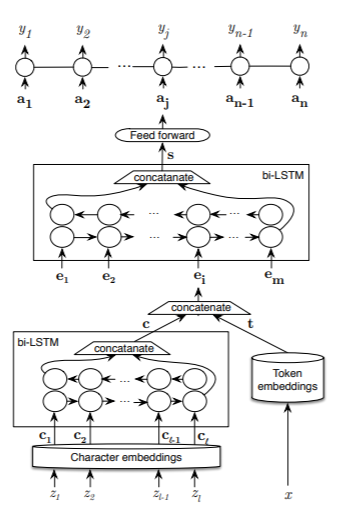

Not using the second bi-lstm in this model

In [ ]:
# 1.) Token inputs/model

token_inputs = layers.Input(shape = [],dtype = tf.string,name = "token_input")

token_embeddings = use_embedding_layer(token_inputs)

token_outputs = layers.Dense(128,activation="relu")(token_embeddings)

token_model = tf.keras.Model(token_inputs,
                             token_outputs)

# 2.) Char inputs/model

char_inputs = layers.Input(shape = (1,),dtype = tf.string,name = "char_input")

char_vectors = char_vectorizer(char_inputs)

char_embeddings = char_embed(char_vectors)

char_bi_lstm = layers.Bidirectional(layers.LSTM(24))(char_embeddings)

char_model = tf.keras.Model(char_inputs,
                            char_bi_lstm)

# 3.) Concatenating token and char inputs (creating hybrid token embedding)

token_char_concat = layers.Concatenate(name = "token_char_hybrid")([token_model.output,
                                                                    char_model.output])

# 4.) Creating output layers and dropout layers( to prevent overfitting)

combined_dropout = layers.Dropout(0.5)(token_char_concat)

combined_dense = layers.Dense(200,activation = "relu")(combined_dropout)

final_dropout = layers.Dropout(0.5)(combined_dense)

output_layer = layers.Dense(num_classes,activation="softmax",name="output_layer")(final_dropout)


# 5.) Constructing the model

model4 = tf.keras.Model(inputs = [token_model.input,char_model.input],
                        outputs = output_layer,
                        name = "Model4_token_char_embeddings")

In [ ]:
model4.summary()

Model: "Model4_token_char_embeddings"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
char_input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
token_input (InputLayer)        [(None,)]            0                                            
__________________________________________________________________________________________________
char_vectorizer (TextVectorizat (None, 290)          0           char_input[0][0]                 
__________________________________________________________________________________________________
USE_Embedding (KerasLayer)      (None, 512)          256797824   token_input[0][0]                
_______________________________________________________________________

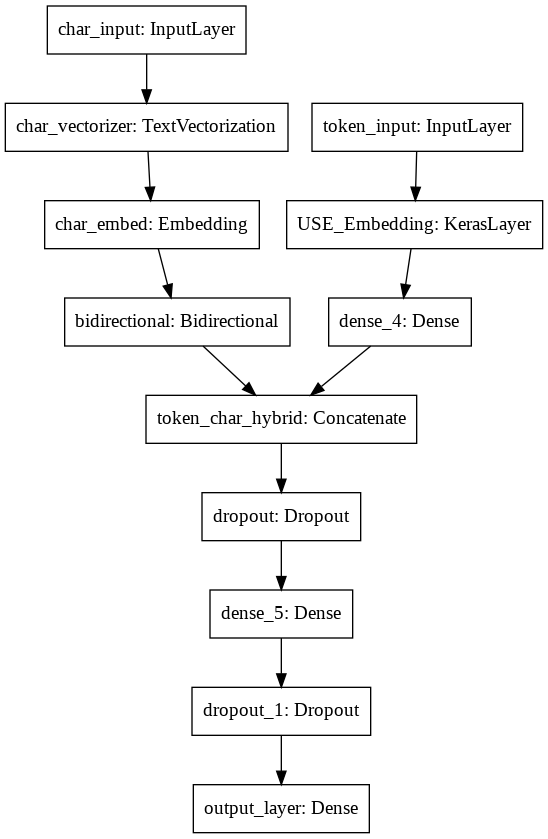

In [ ]:
# Visualizing the model/ Plotting the model

from keras.utils.vis_utils import plot_model

plot_model(model4)

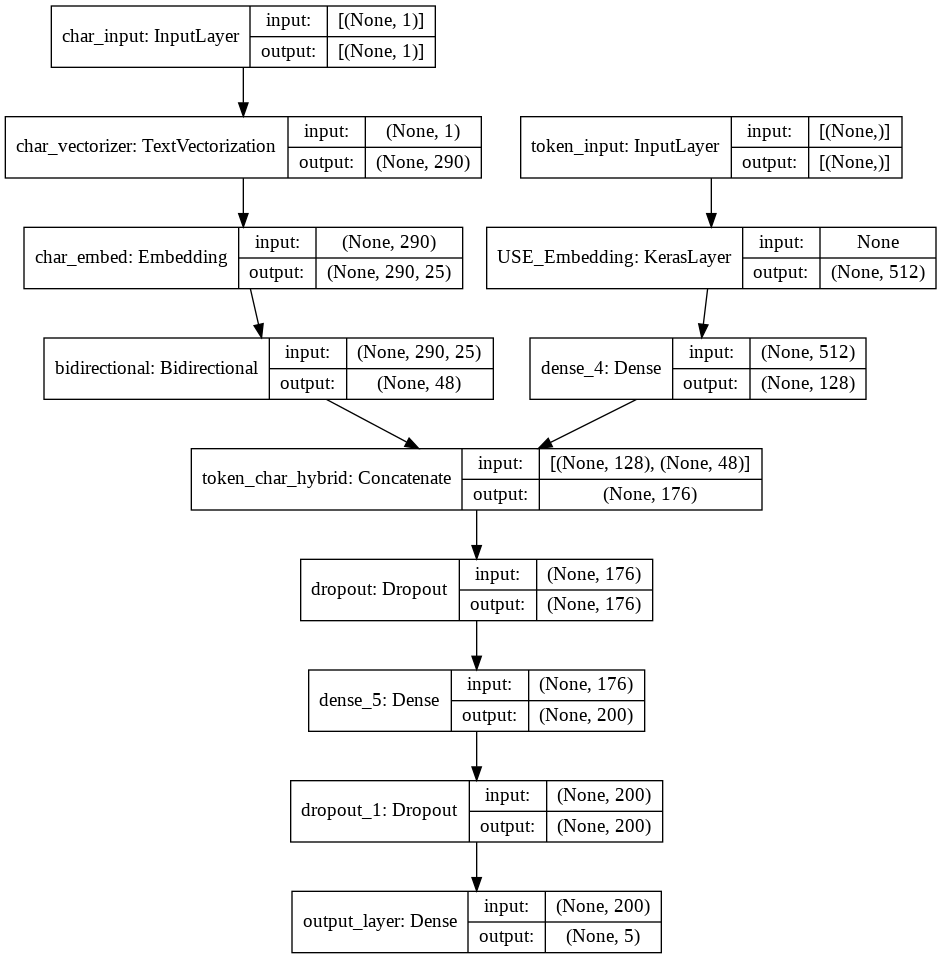

In [ ]:
plot_model(model4,show_shapes = True)

In [ ]:
# Read widetext airbnb for example of multimodel model on another topic

In [ ]:
# Compiling

model4.compile(loss = "categorical_crossentropy",
              optimizer = "Adam",
              metrics = ["accuracy"])

In [ ]:
# Creating tf datasets/ efficient data pipelines

# FOR TRAIN DATA

train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sentences,train_chars))

train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)

train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data,train_char_token_labels))


# Prefetch and Batch train data

train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


# FOR VALIDATION DATA

val_char_token_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))

val_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)

val_char_token_dataset = tf.data.Dataset.zip((val_char_token_data, val_char_token_labels))

val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


In [ ]:
# Fitting

model4_history = model4.fit(train_char_token_dataset,
                            epochs = 3,
                            steps_per_epoch = 0.1*len(train_char_token_dataset),
                            validation_data = val_char_token_dataset,
                            validation_steps = int(0.1*len(val_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - 36s 50ms/step - loss: 0.9629 - accuracy: 0.6167 - val_loss: 0.7711 - val_accuracy: 0.7025
Epoch 2/3
562/562 [==============================] - 26s 46ms/step - loss: 0.7893 - accuracy: 0.6938 - val_loss: 0.7069 - val_accuracy: 0.7324
Epoch 3/3
562/562 [==============================] - 23s 40ms/step - loss: 0.7667 - accuracy: 0.7076 - val_loss: 0.6862 - val_accuracy: 0.7417


In [ ]:
# Evaluating

model4.evaluate(val_char_token_dataset)

944/944 [==============================] - 21s 22ms/step - loss: 0.6968 - accuracy: 0.7339


[0.6968297362327576, 0.7339227795600891]

In [ ]:
model4_pred_probs = model4.predict(val_char_token_dataset)

model4_preds = tf.argmax(model4_pred_probs,axis = 1)

model4_preds

<tf.Tensor: shape=(30198,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 1, 1])>

In [ ]:
# Calculating results

model4_results = calculate_results(val_labels_encoded,
                                   model4_preds)

model4_results

{'accuracy': 73.39227763428042,
 'f1': 0.7319719904432074,
 'precision': 0.7361889854026852,
 'recall': 0.7339227763428041}

##### *Another thing that can be done is taking into consideration the order in which the sentences occur.*

##### *For this we can have a Label Sequence optimization layer*

### Introducing positional embeddings

# Model-5 Transfer Learning with pretrained token embeddings + character embeddings + positional embeddings

In [ ]:
train_df.head()

,line_number,target,text,total_lines
0,0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,12
1,1,METHODS,a total of @ patients with primary knee oa wer...,12
2,2,METHODS,outcome measures included pain reduction and i...,12
3,3,METHODS,pain was assessed using the visual analog pain...,12
4,4,METHODS,secondary outcome measures included the wester...,12


In [ ]:
# Finding value counts of line numbers

train_df["line_number"].value_counts()

0     14999
1     14999
2     14999
3     14999
4     14991
5     14948
6     14757
7     14278
8     13345
9     11980
10    10040
11     7891
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: line_number, dtype: int64

In [ ]:
# One hot encoding line numbers

train_line_numbers_one_hot = tf.one_hot(train_df["line_number"].to_numpy(),depth = 15)

train_line_numbers_one_hot[:10],train_line_numbers_one_hot.shape

(<tf.Tensor: shape=(10, 15), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]],
       dtype=float32)>, TensorShape([180028, 15]))

In [ ]:
val_line_numbers_one_hot = tf.one_hot(val_df["line_number"].to_numpy(), depth=15)

test_line_numbers_one_hot = tf.one_hot(test_df["line_number"].to_numpy(), depth=15)

In [ ]:
train_df["total_lines"].value_counts()

12    24456
11    23639
13    22113
10    19400
14    18438
15    14610
9     12285
16    10768
8      7464
17     7429
18     5202
7      3353
19     3344
20     2480
21     1281
6      1146
22      770
23      759
24      264
5       215
25      200
26      182
27       81
29       58
4        32
31       31
28       28
Name: total_lines, dtype: int64

Text(0, 0.5, 'freq')

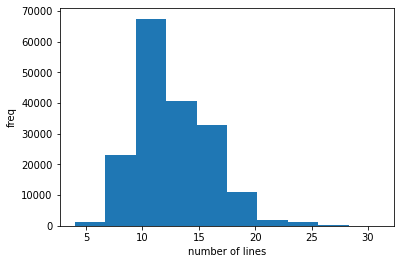

In [ ]:
plt.hist(train_df["total_lines"])
plt.xlabel("number of lines")
plt.ylabel("freq")

In [ ]:
np.percentile(train_df.total_lines,98)

21.0

In [ ]:
# One hot encoding total lines

train_total_lines_one_hot = tf.one_hot(train_df["total_lines"].to_numpy(), depth=20)
val_total_lines_one_hot = tf.one_hot(val_df["total_lines"].to_numpy(), depth=20)
test_total_lines_one_hot = tf.one_hot(test_df["total_lines"].to_numpy(), depth=20)

# Check shape and samples of total lines one-hot tensor
train_total_lines_one_hot.shape, train_total_lines_one_hot[:10]

(TensorShape([180028, 20]), <tf.Tensor: shape=(10, 20), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.

### Steps to be followed

1.) Build the token-level model

2.) Build a character-level model

3.) Create a model for line number feature

4.) Create a model for total lines feature

5.) Combine the outputs of 1 and 2 using concatenate

6.) Dense and Dropout layer

7.) Combine outputs of 3,4,5 using concatenate

8.) Create an output layer to accept this embedding and output label probs

9.) Combine the inputs of 1,2,3,4 and outputs of the above into a Model

In [ ]:
# Step 1 Building the token-level model

token_inputs = layers.Input(shape = [],dtype = "string",name = "token_inputs")

token_embeddings = use_embedding_layer(token_inputs)

token_outputs = layers.Dense(128,activation="relu")(token_embeddings)

token_model = tf.keras.Model(token_inputs,token_outputs)

In [ ]:
# Step 2 Building a character-level model

char_inputs = layers.Input(shape = (1,),dtype = "string",name = "char_inputs")

char_vectors = char_vectorizer(char_inputs)

char_embeddings = char_embed(char_vectors)

char_bi_lstm = layers.Bidirectional(layers.LSTM(24))(char_embeddings)

char_model = tf.keras.Model(char_inputs,
                            char_bi_lstm)

In [ ]:
# Step 3 Creating a model for line number feature

line__number_inputs = layers.Input(shape = (15,),dtype = tf.float32,name = "line__number_input")

x = layers.Dense(32,activation="relu")(line__number_inputs)

line_number_model = tf.keras.Model(line__number_inputs,x)

In [ ]:
# Step 4 Creating a model for total lines feature

total_lines_inputs = layers.Input(shape = (20,),dtype = tf.float32,name = "total_lines_input")

y = layers.Dense(32,activation="relu")(total_lines_inputs)

total_lines_model = tf.keras.Model(total_lines_inputs,y)

In [ ]:
# Step 5 Combine the outputs of 1 and 2 using concatenate

combined_embedding = layers.Concatenate(name = "char_token_hybrid_embedding")([token_model.output,char_model.output])

In [ ]:
# Step 6 Dense and Dropout layer

z = layers.Dense(256,activation="relu")(combined_embedding)

z = layers.Dropout(0.5)(z)

In [ ]:
# Step 7 Combine outputs of 3,4,5 using concatenate
# Combining positional embedding with combined token and char level embeddings

tribrid_embeddings = layers.Concatenate(name = "char_token_positional_embeddings")([line_number_model.output,
                                                                                   total_lines_model.output,
                                                                                   z])

In [ ]:
# Step 8 Create an output layer to accept this embedding and output label probs

output_layer = layers.Dense(5,activation="softmax",name = "output_layer")(tribrid_embeddings)

In [ ]:
# Step 9 Combine the inputs of 1,2,3,4 and outputs of the above into a Model

model5 = tf.keras.Model(inputs = [line_number_model.input,
                                  total_lines_model.input,
                                  token_model.input,
                                  char_model.input],
                        outputs = output_layer)

In [ ]:
model5.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
char_inputs (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
token_inputs (InputLayer)       [(None,)]            0                                            
__________________________________________________________________________________________________
char_vectorizer (TextVectorizat (None, 290)          0           char_inputs[0][0]                
__________________________________________________________________________________________________
USE_Embedding (KerasLayer)      (None, 512)          256797824   token_inputs[0][0]               
____________________________________________________________________________________________

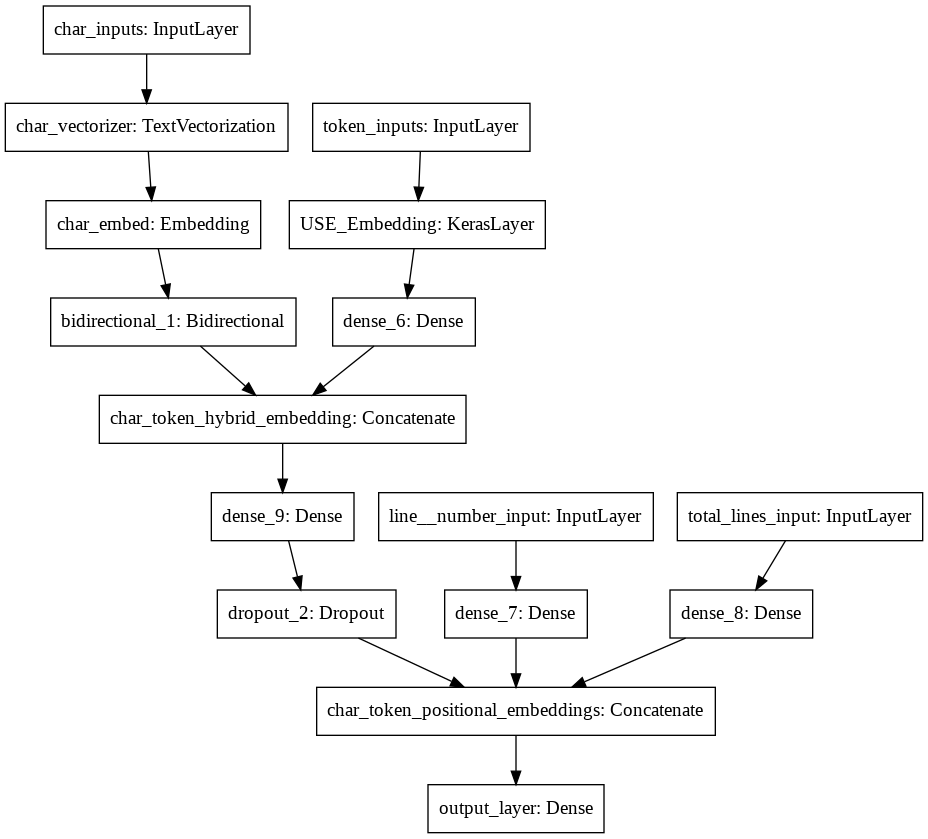

In [ ]:
plot_model(model5)

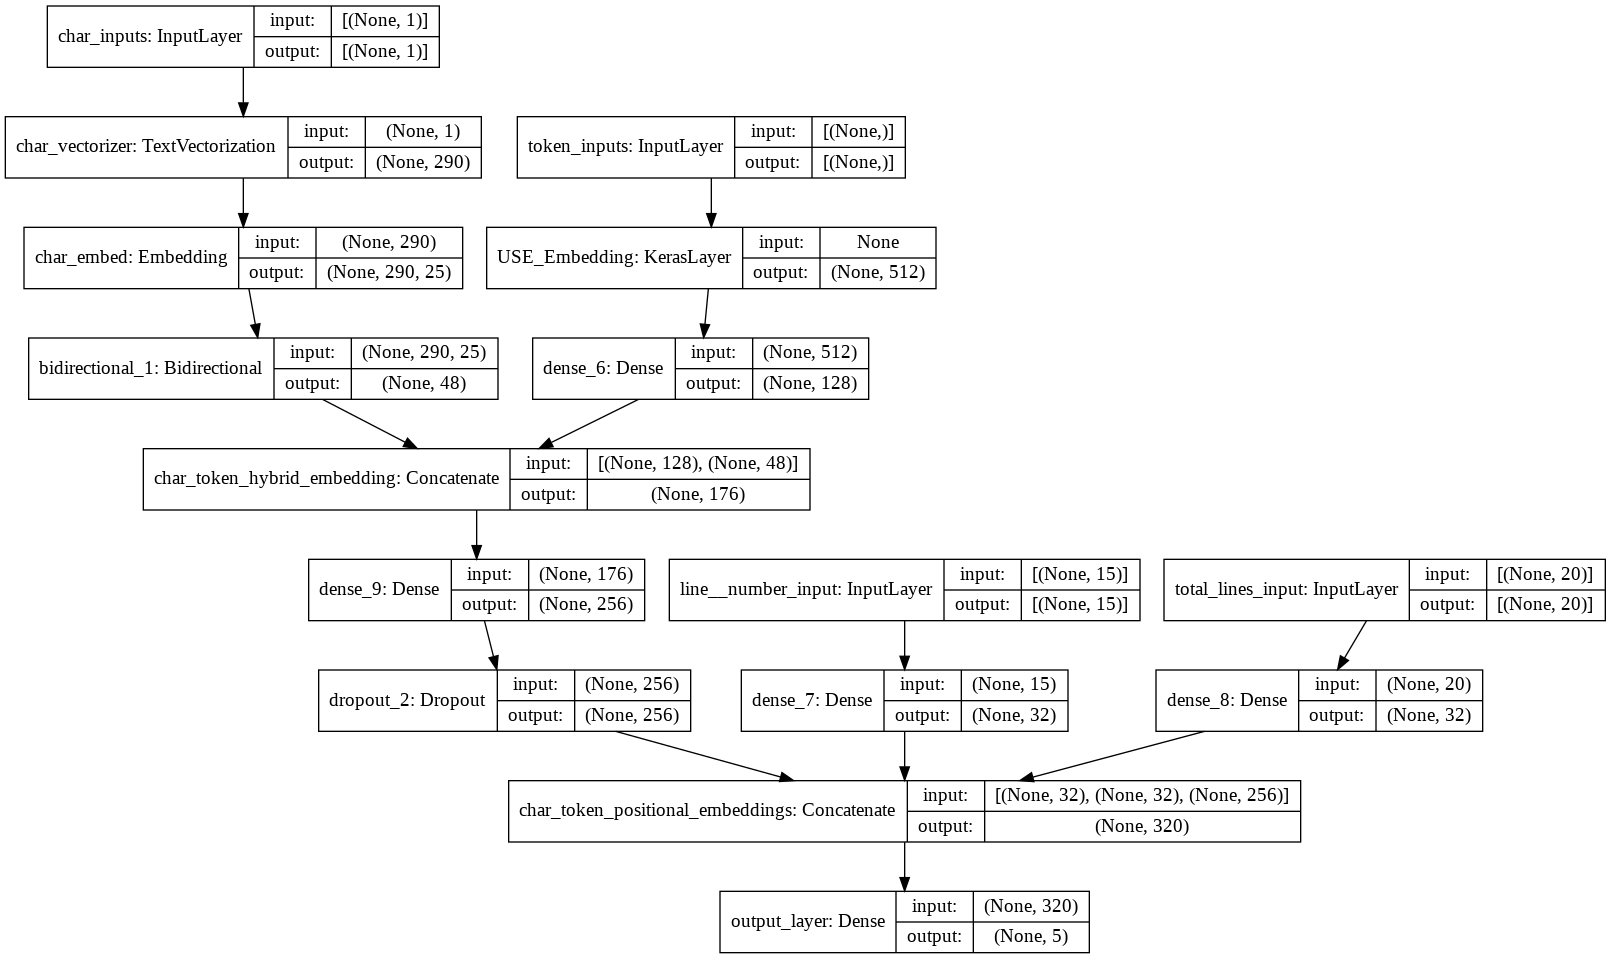

In [ ]:
plot_model(model5,show_shapes = True)

**Compiling**

Using Label smoothing in CategoricalCrossentropy to prevent overfitting

In [ ]:
model5.compile(loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2),
               optimizer = "Adam",
               metrics = ["accuracy"])

In [ ]:
# Creating datasets using tf.data

# ** IMPORTANT** The order in which we put our data must be exactly how we build the model to take inputs.

train_char_token_pos_data = tf.data.Dataset.from_tensor_slices((train_line_numbers_one_hot,
                                                                train_total_lines_one_hot,
                                                                train_sentences,
                                                                train_chars))

train_char_token_pos_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)

train_char_token_pos_dataset = tf.data.Dataset.zip((train_char_token_pos_data,train_char_token_pos_labels))

train_char_token_pos_dataset = train_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# Same for validation dataset

val_pos_char_token_data = tf.data.Dataset.from_tensor_slices((val_line_numbers_one_hot,
                                                              val_total_lines_one_hot,
                                                              val_sentences,
                                                              val_chars))

val_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)

val_pos_char_token_dataset = tf.data.Dataset.zip((val_pos_char_token_data, val_pos_char_token_labels))

val_pos_char_token_dataset = val_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_char_token_pos_dataset,val_pos_char_token_dataset

(<PrefetchDataset shapes: (((None, 15), (None, 20), (None,), (None,)), (None, 5)), types: ((tf.float32, tf.float32, tf.string, tf.string), tf.float64)>,
 <PrefetchDataset shapes: (((None, 15), (None, 20), (None,), (None,)), (None, 5)), types: ((tf.float32, tf.float32, tf.string, tf.string), tf.float64)>)

In [ ]:
# Fitting

# Also training it on 100% data

model5_history = model5.fit(train_char_token_pos_dataset,
                            epochs = 3,
                            steps_per_epoch = len(train_char_token_pos_dataset),
                            validation_data= val_pos_char_token_dataset,
                            validation_steps = len(val_pos_char_token_dataset))

Epoch 1/3
5626/5626 [==============================] - 281s 49ms/step - loss: 0.9519 - accuracy: 0.8251 - val_loss: 0.9074 - val_accuracy: 0.8490
Epoch 2/3
5626/5626 [==============================] - 267s 48ms/step - loss: 0.9082 - accuracy: 0.8546 - val_loss: 0.8978 - val_accuracy: 0.8540
Epoch 3/3
5626/5626 [==============================] - 267s 47ms/step - loss: 0.8959 - accuracy: 0.8630 - val_loss: 0.8955 - val_accuracy: 0.8561


In [ ]:
model5_pred_probs = model5.predict(val_pos_char_token_dataset)

model5_preds = tf.argmax(model5_pred_probs, axis = 1)

model5_preds

<tf.Tensor: shape=(30198,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 1, 1])>

In [ ]:
model5.evaluate(val_pos_char_token_dataset)

944/944 [==============================] - 21s 22ms/step - loss: 0.8955 - accuracy: 0.8561


[0.8954699039459229, 0.8560831546783447]

In [ ]:
model5_results = calculate_results(val_labels_encoded,
                                   model5_preds)

# Comparing model results

In [ ]:

# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"Model0-Baseline": baseline_results,
                                  "Model1-Custom_token_embed_conv1d": model1_results,
                                  "Model2-Pretrained_token_embed": model2_results,
                                  "Model3-Custom_char_embed_conv1d": model3_results,
                                  "Model04-Hybrid_char_token_embed": model4_results,
                                  "Model5-Tribrid_pos_char_token_embed": model5_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
Model0-Baseline,72.200146,0.718925,0.722001,0.699083
Model1-Custom_token_embed_conv1d,78.587986,0.783101,0.785880,0.783613
Model2-Pretrained_token_embed,71.352407,0.714284,0.713524,0.710687
Model3-Custom_char_embed_conv1d,64.504272,0.646562,0.645043,0.630585
Model04-Hybrid_char_token_embed,73.392278,0.736189,0.733923,0.731972
Model5-Tribrid_pos_char_token_embed,85.608318,0.858583,0.856083,0.852953


In [ ]:
# Reduce the accuracy to same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100

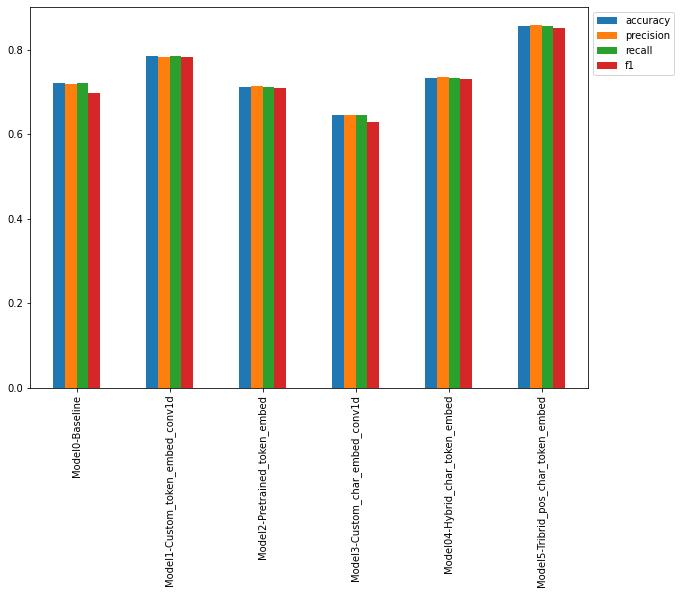

In [ ]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

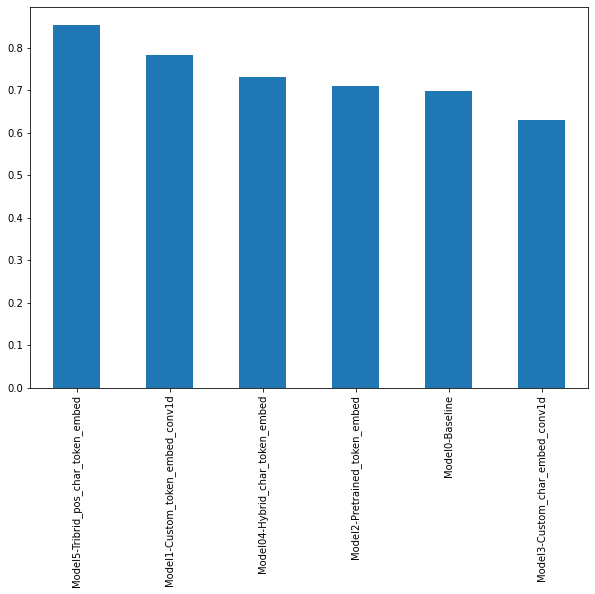

In [ ]:
# Sort model results by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

In [ ]:
# Saving the model

model5.save("SkimLit_Final_Model")

INFO:tensorflow:Assets written to: SkimLit_Final_Model/assets


INFO:tensorflow:Assets written to: SkimLit_Final_Model/assets


In [ ]:
# Loading model

loaded_model = tf.keras.models.load_model("SkimLit_Final_Model")

In [ ]:
loaded_model.evaluate(val_pos_char_token_dataset)

944/944 [==============================] - 23s 22ms/step - loss: 0.8955 - accuracy: 0.8561


[0.8954699039459229, 0.8560831546783447]

In [ ]:
# Downloading the model

!zip -r model.zip {"/content/SkimLit_Final_Model"}

try:
  from google.colab import files
  files.download('./model.zip')
except ImportError:
  pass

  adding: content/SkimLit_Final_Model/ (stored 0%)
  adding: content/SkimLit_Final_Model/keras_metadata.pb (deflated 91%)
  adding: content/SkimLit_Final_Model/saved_model.pb (deflated 77%)
  adding: content/SkimLit_Final_Model/variables/ (stored 0%)
  adding: content/SkimLit_Final_Model/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/SkimLit_Final_Model/variables/variables.index (deflated 77%)
  adding: content/SkimLit_Final_Model/assets/ (stored 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Evaluating on test data

In [ ]:
# Create test dataset batch and prefetched
test_pos_char_token_data = tf.data.Dataset.from_tensor_slices((test_line_numbers_one_hot,
                                                               test_total_lines_one_hot,
                                                               test_sentences,
                                                               test_chars))
test_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)

test_pos_char_token_dataset = tf.data.Dataset.zip((test_pos_char_token_data, test_pos_char_token_labels))

test_pos_char_token_dataset = test_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

test_pos_char_token_dataset

<PrefetchDataset shapes: (((None, 15), (None, 20), (None,), (None,)), (None, 5)), types: ((tf.float32, tf.float32, tf.string, tf.string), tf.float64)>

In [ ]:
test_pred_probs = model5.predict(test_pos_char_token_dataset)

test_preds = tf.argmax(test_pred_probs, axis = 1)

In [ ]:
test_results = calculate_results(test_labels_encoded,test_preds)

test_results

{'accuracy': 85.27741806952885,
 'f1': 0.8494807702422588,
 'precision': 0.8538447927144512,
 'recall': 0.8527741806952884}

Fine tuning may help in improving the results. Try it later

### Finding out wrong predictions

In [ ]:
test_pred_classes = [label_encoder.classes_[pred] for pred in test_preds]
test_pred_classes

['OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'BACKGROUND',
 'BACKGROUND',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'BACKGROUND',
 'BACKGROUND',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'BACKGROUND',
 'METHODS',
 'BACKGROUND',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'BACKGROUND',
 'BACKGROUND',
 'BACKGROUND',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'RESULTS',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'METHODS',
 'RESULTS',
 'RESULTS',

In [ ]:
test_df["prediction"] = test_pred_classes

test_df["pred_prob"] = tf.reduce_max(test_pred_probs, axis=1).numpy()

test_df["correct"] = test_df["prediction"] == test_df["target"]

test_df.head(20)

,line_number,target,text,total_lines,prediction,pred_prob,correct
0,0,BACKGROUND,this study analyzed liver function abnormaliti...,9,OBJECTIVE,0.364407,False
1,1,RESULTS,a post hoc analysis was conducted with the use...,9,METHODS,0.473498,False
2,2,RESULTS,liver function tests ( lfts ) were measured at...,9,METHODS,0.810183,False
3,3,RESULTS,survival analyses were used to assess the asso...,9,METHODS,0.812505,False
4,4,RESULTS,the percentage of patients with abnormal lfts ...,9,RESULTS,0.777565,True
5,5,RESULTS,when mean hemodynamic profiles were compared i...,9,RESULTS,0.850479,True
6,6,RESULTS,multivariable analyses revealed that patients ...,9,RESULTS,0.679575,True
7,7,CONCLUSIONS,abnormal lfts are common in the adhf populatio...,9,CONCLUSIONS,0.733209,True
8,8,CONCLUSIONS,elevated meld-xi scores are associated with po...,9,CONCLUSIONS,0.683215,True
9,0,BACKGROUND,minimally invasive endovascular aneurysm repai...,13,BACKGROUND,0.640505,True


In [ ]:
# Top 100 wrong preds

top_100_wrong = test_df[test_df["correct"] == False].sort_values("pred_prob", ascending=False)[:100]

top_100_wrong

,line_number,target,text,total_lines,prediction,pred_prob,correct
8545,1,METHODS,pretest-posttest .,12,BACKGROUND,0.961048,False
1827,18,CONCLUSIONS,nct@ ( clinicaltrials.gov ) .,19,BACKGROUND,0.958530,False
18720,8,RESULTS,non-diffuse-trickling '' ) .,16,BACKGROUND,0.933572,False
22736,4,OBJECTIVE,"the national institute of oncology , budapest ...",21,METHODS,0.927504,False
16347,0,BACKGROUND,to evaluate the effects of the lactic acid bac...,13,OBJECTIVE,0.926429,False
...,...,...,...,...,...,...,...
15674,3,RESULTS,both intervention groups included a face-to-fa...,11,METHODS,0.851808,False
12823,5,BACKGROUND,the trial is an international collaborative co...,16,METHODS,0.851019,False
5252,10,CONCLUSIONS,there was no difference between the t-piece re...,12,RESULTS,0.850609,False
5664,8,METHODS,response rates were high across all follow-ups...,16,RESULTS,0.850161,False


# MAKING PREDICTION ON SAMPLE DATA

In [ ]:
abstract = "This RCT examined the efficacy of a manualized social intervention for children with HFASDs. Participants were randomly assigned to treatment or wait-list conditions. Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language. A response-cost program was applied to reduce problem behaviors and foster skills acquisition. Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures). Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents. High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity. Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group."

abstract

'This RCT examined the efficacy of a manualized social intervention for children with HFASDs. Participants were randomly assigned to treatment or wait-list conditions. Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language. A response-cost program was applied to reduce problem behaviors and foster skills acquisition. Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures). Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents. High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity. Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.'

  ##### Preprocessing Steps

  * split into sentences
  * split into chars
  * find line number
  * find total lines

In [ ]:
# Using Space for preprocessing

In [ ]:
from spacy.lang.en import English

nlp = English()

sentencizer = nlp.create_pipe("sentencizer") # Splitting sentences

nlp.add_pipe(sentencizer) # add sentence splitting pipeline object to sentence parser

doc = nlp(abstract)

abstract_lines = [str(sent) for sent in list(doc.sents)]

abstract_lines

['This RCT examined the efficacy of a manualized social intervention for children with HFASDs.',
 'Participants were randomly assigned to treatment or wait-list conditions.',
 'Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.',
 'A response-cost program was applied to reduce problem behaviors and foster skills acquisition.',
 'Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).',
 'Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.',
 'High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity.',
 'Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.']

In [ ]:
total_lines_in_sample = len(abstract_lines)

sample_lines = []
for i, line in enumerate(abstract_lines):
  sample_dict = {}
  sample_dict["text"] = str(line)
  sample_dict["line_number"] = i
  sample_dict["total_lines"] = total_lines_in_sample - 1
  sample_lines.append(sample_dict)
sample_lines

[{'line_number': 0,
  'text': 'This RCT examined the efficacy of a manualized social intervention for children with HFASDs.',
  'total_lines': 7},
 {'line_number': 1,
  'text': 'Participants were randomly assigned to treatment or wait-list conditions.',
  'total_lines': 7},
 {'line_number': 2,
  'text': 'Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.',
  'total_lines': 7},
 {'line_number': 3,
  'text': 'A response-cost program was applied to reduce problem behaviors and foster skills acquisition.',
  'total_lines': 7},
 {'line_number': 4,
  'text': 'Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).',
  'total_lines': 7},
 {'line_number': 5,
  'text': 'Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.',
  'total_lines': 7},
 {'line_

In [ ]:
# Get all line_number values from sample abstract

test_abstract_line_numbers = [line["line_number"] for line in sample_lines]

# One-hot encode to same depth as training data, so model accepts right input shape

test_abstract_line_numbers_one_hot = tf.one_hot(test_abstract_line_numbers, depth=15) 

test_abstract_line_numbers_one_hot

<tf.Tensor: shape=(8, 15), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)>

In [ ]:
# Get all total_lines values from sample abstract

test_abstract_total_lines = [line["total_lines"] for line in sample_lines]

# One-hot encode to same depth as training data, so model accepts right input shape

test_abstract_total_lines_one_hot = tf.one_hot(test_abstract_total_lines, depth=20)

test_abstract_total_lines_one_hot

<tf.Tensor: shape=(8, 20), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [ ]:

# Split abstract lines into characters
abstract_chars = [split_chars(sentence) for sentence in abstract_lines]

abstract_chars

['T h i s   R C T   e x a m i n e d   t h e   e f f i c a c y   o f   a   m a n u a l i z e d   s o c i a l   i n t e r v e n t i o n   f o r   c h i l d r e n   w i t h   H F A S D s .',
 'P a r t i c i p a n t s   w e r e   r a n d o m l y   a s s i g n e d   t o   t r e a t m e n t   o r   w a i t - l i s t   c o n d i t i o n s .',
 'T r e a t m e n t   i n c l u d e d   i n s t r u c t i o n   a n d   t h e r a p e u t i c   a c t i v i t i e s   t a r g e t i n g   s o c i a l   s k i l l s ,   f a c e - e m o t i o n   r e c o g n i t i o n ,   i n t e r e s t   e x p a n s i o n ,   a n d   i n t e r p r e t a t i o n   o f   n o n - l i t e r a l   l a n g u a g e .',
 'A   r e s p o n s e - c o s t   p r o g r a m   w a s   a p p l i e d   t o   r e d u c e   p r o b l e m   b e h a v i o r s   a n d   f o s t e r   s k i l l s   a c q u i s i t i o n .',
 'S i g n i f i c a n t   t r e a t m e n t   e f f e c t s   w e r e   f o u n d   f o r   f i v e   o f   s e v e n   p 

In [ ]:
# Making predictions

sample_abstract_pred_probs = model5.predict(x=(test_abstract_line_numbers_one_hot,
                                                   test_abstract_total_lines_one_hot,
                                                   tf.constant(abstract_lines),
                                                   tf.constant(abstract_chars)))

sample_abstract_preds = tf.argmax(sample_abstract_pred_probs,axis = 1)

In [ ]:
# Turn prediction class integers into string class names
sample_abstract_class = [label_encoder.classes_[i] for i in sample_abstract_preds]

sample_abstract_class

['OBJECTIVE',
 'METHODS',
 'METHODS',
 'CONCLUSIONS',
 'RESULTS',
 'METHODS',
 'RESULTS',
 'RESULTS']

In [ ]:
# Visualizing the output

for i, line in enumerate(abstract_lines): 
  print(f"\033[1m{sample_abstract_class[i]}: "+ f"\033[0m{line}")

  # \033[1m for bold text

  # \033[0m for non-bold text

OBJECTIVE: This RCT examined the efficacy of a manualized social intervention for children with HFASDs.
METHODS: Participants were randomly assigned to treatment or wait-list conditions.
METHODS: Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.
CONCLUSIONS: A response-cost program was applied to reduce problem behaviors and foster skills acquisition.
RESULTS: Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).
METHODS: Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.
RESULTS: High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity.
RESULTS: Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.


In [ ]:
# Trying Gradio

# Really bad function just to test working and gradio

# Create function to pass to Gradio interface
def skimlit(abstract):
  nlp = English()

  sentencizer = nlp.create_pipe("sentencizer")

  nlp.add_pipe(sentencizer) 

  doc = nlp(abstract)

  abstract_lines = [str(sent) for sent in list(doc.sents)]

  total_lines_in_sample = len(abstract_lines)

  sample_lines = []
  for i, line in enumerate(abstract_lines):
    sample_dict = {}
    sample_dict["text"] = str(line)
    sample_dict["line_number"] = i
    sample_dict["total_lines"] = total_lines_in_sample - 1
    sample_lines.append(sample_dict)

  test_abstract_line_numbers = [line["line_number"] for line in sample_lines]

  test_abstract_line_numbers_one_hot = tf.one_hot(test_abstract_line_numbers, depth=15) 

  test_abstract_total_lines = [line["total_lines"] for line in sample_lines]

  test_abstract_total_lines_one_hot = tf.one_hot(test_abstract_total_lines, depth=20)

  abstract_chars = [split_chars(sentence) for sentence in abstract_lines]

  sample_abstract_pred_probs = model5.predict(x=(test_abstract_line_numbers_one_hot,
                                                   test_abstract_total_lines_one_hot,
                                                   tf.constant(abstract_lines),
                                                   tf.constant(abstract_chars)))

  sample_abstract_preds = tf.argmax(sample_abstract_pred_probs,axis = 1)

  sample_abstract_class = [label_encoder.classes_[i] for i in sample_abstract_preds]

  ans = []

  for i, line in enumerate(abstract_lines):
    ans.append([sample_abstract_class[i],line]) 

  s = ""

  for i in ans:
    s = s+i[0]+"\n\n"+i[1]+" \n\n"
    # print(f"\033[1m{i[0]}: "+ f"\033[0m{i[1]}")

  return s

In [ ]:
# !pip install gradio

In [ ]:
import gradio as gr

gr.Interface(fn=skimlit,
             inputs=gr.inputs.Textbox(lines=10,label = "Enter Abstract"),
             outputs=gr.outputs.Textbox()).launch() # debug=True = show errors in notebook


Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://50370.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7866/',
 'https://50370.gradio.app')

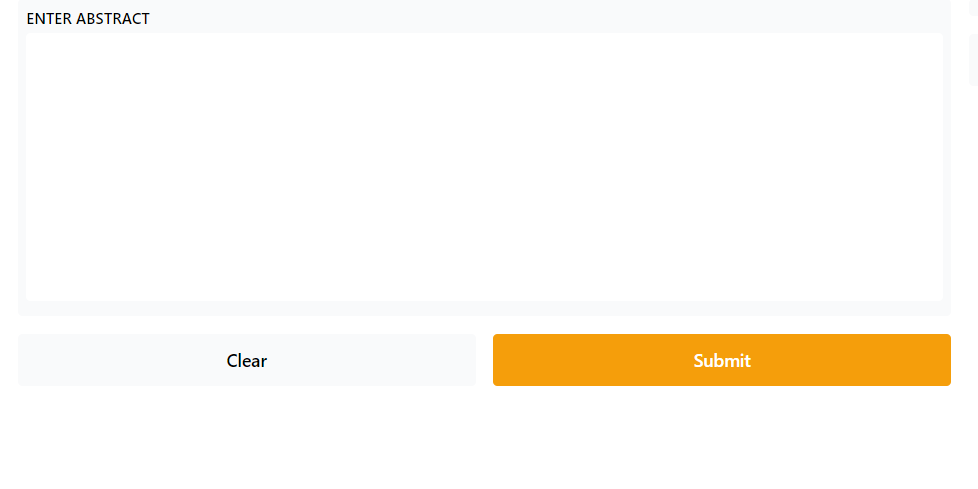

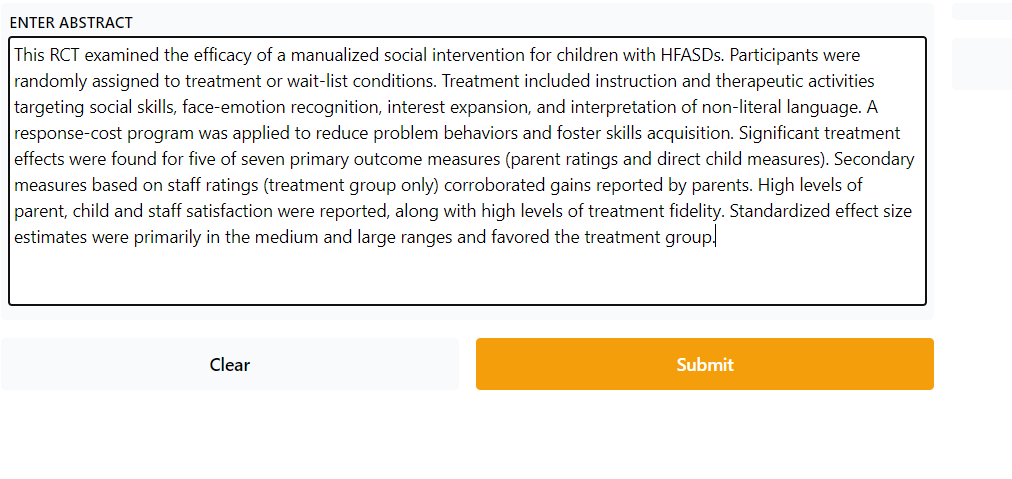

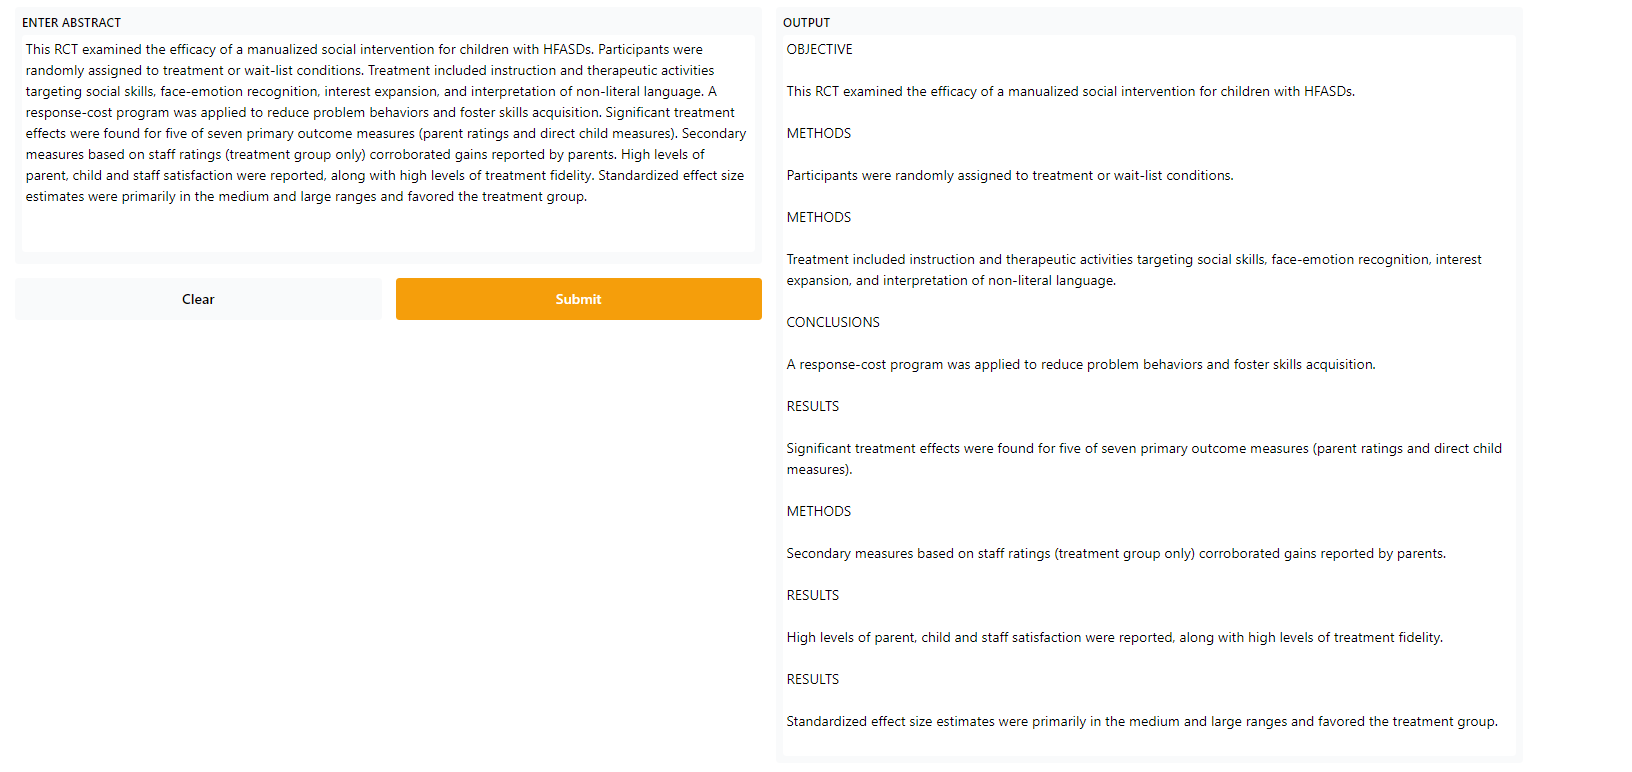